# EDA part 2 Studio

## Further Analysis of IMDB movies

In this studio, we're returning to this [tutorial](https://towardsdatascience.com/understand-the-data-with-univariate-and-multivariate-charts-and-plots-in-python-3b9fcd68cd8) as a reference guide for our EDA.
You've seen the data set before and you've worked through similar kinds of questions with the heart disease dataset. 

Blocks have been created for your code and we've asked you to add more in some places.

The dataset from [Kaggle](https://www.kaggle.com/PromptCloudHQ/imdb-data)

### 1. Find the relative proportions of movie genres represented.

In [9]:
# import dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# create your data variabe using .read_csv 
df = pd.read_csv('IMDB-Movie-Data.csv')
# get reaquainted with the data by viewing the first 5 rows
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [10]:
# list the column names
list(df.columns)

['Rank',
 'Title',
 'Genre',
 'Description',
 'Director',
 'Actors',
 'Year',
 'Runtime (Minutes)',
 'Rating',
 'Votes',
 'Revenue (Millions)',
 'Metascore']

In [11]:
# preview the contents of the 'Genre' column only
df['Genre'].head()

0     Action,Adventure,Sci-Fi
1    Adventure,Mystery,Sci-Fi
2             Horror,Thriller
3     Animation,Comedy,Family
4    Action,Adventure,Fantasy
Name: Genre, dtype: object

In [22]:
# using the .value_counts() method, explore the number of each genre type in the series
# assign the result to a variable called genre_counts
genre_counts = df['Genre'].value_counts()
genre_counts
genre_counts.shape

(207,)

In [26]:
# Find the proportions of each genre by dividing your variable assigned above by the sum of 
# all of the unique genre values
# assign this to the variable genre_proportions
genre_proportions = genre_counts/sum(genre_counts)*100
genre_proportions

Action,Adventure,Sci-Fi    5.0
Drama                      4.8
Comedy,Drama,Romance       3.5
Comedy                     3.2
Drama,Romance              3.1
                          ... 
Action,Comedy,Family       0.1
Action,Crime,Fantasy       0.1
Comedy,Mystery             0.1
Adventure,Comedy,Horror    0.1
Comedy,Family,Fantasy      0.1
Name: Genre, Length: 207, dtype: float64

In [27]:
# the length of results a above is too long to know if there are any null values present
# we can run .isna() on the series and collect the sum to check if there are missing values
# uncomment the line below to see the results
(df['Genre'].isna().sum())


0

In [28]:
# use .head() on genre_proportions to get a better look at the top 20 
genre_proportions.head(20)
# remember: .head() can take a parameter to display more than 5 entries 


Action,Adventure,Sci-Fi       5.0
Drama                         4.8
Comedy,Drama,Romance          3.5
Comedy                        3.2
Drama,Romance                 3.1
Animation,Adventure,Comedy    2.7
Action,Adventure,Fantasy      2.7
Comedy,Drama                  2.7
Comedy,Romance                2.6
Crime,Drama,Thriller          2.4
Crime,Drama,Mystery           2.3
Action,Adventure,Drama        1.8
Action,Crime,Drama            1.7
Horror,Thriller               1.6
Drama,Thriller                1.5
Adventure,Family,Fantasy      1.4
Biography,Drama,History       1.4
Action,Adventure,Comedy       1.4
Biography,Drama               1.4
Action,Comedy,Crime           1.2
Name: Genre, dtype: float64

### 2. Find the minimum, maximum, average, and standard deviation of revenue data.

In [39]:
# use .describe() on the revenue column to see some summary statistics of the revenue data present
df['Revenue (Millions)'].describe()

count    872.000000
mean      82.956376
std      103.253540
min        0.000000
25%       13.270000
50%       47.985000
75%      113.715000
max      936.630000
Name: Revenue (Millions), dtype: float64

Do we have any missing revenue entries?
Add a new code cell below this and use ``.isna()`` on the column to check.
Ask yourself: does this affect the results of ``.describe()``?
Hint: look at the count result above and compare that with the ``Length`` returned with ``.isna()``

In [41]:
df['Revenue (Millions)'].isna().sum()

128

In [43]:
!pip install seaborn

### 3. Make a plot distribution of the revenue data.


<AxesSubplot:xlabel='Revenue (Millions)', ylabel='Count'>

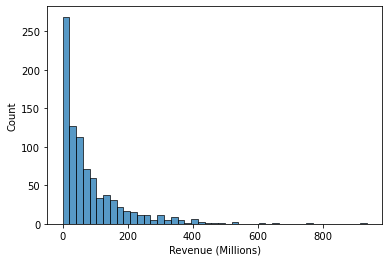

In [48]:
# use sns.histplot to get a birds eye view of the revenue distribution
# Note: the refernce article plots Cholesterol data with ``distplot`` but we recieve 
# a deprecation warning so we've switched it with ``histplot``. The resulting graph is 
# virtually the same.
sns.histplot(df, x='Revenue (Millions)')


Look back at your ``.describe()`` results above. Does this plotted distribution match the results of the 25%, 50%, and 75% percentile data?

Create another code cell below this and make another histplot but with only the top 20 items in the revenue column. Run ``.describe()`` on the top 20 to again check the percentile distributions with what the graph displays.

<AxesSubplot:xlabel='Revenue (Millions)', ylabel='Count'>

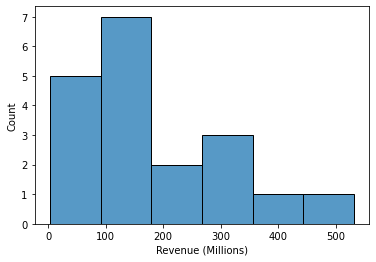

In [55]:
sns.histplot(df['Revenue (Millions)'].head(20))

In [56]:
df['Revenue (Millions)'].head(20).describe()

count     19.000000
mean     180.743158
std      138.787767
min        2.870000
25%       83.565000
50%      151.060000
75%      259.535000
max      532.170000
Name: Revenue (Millions), dtype: float64

### 4. Find the % of movies with a higher than avergage Rating

In [58]:
# create a variable called mean_rating.
# assign mean_rating the result of running ``.mean()`` on the rating column.
mean_rating = df['Rating'].mean()
mean_rating

6.723200000000003

In [67]:
# Find the dataset where a movie's rating is higher than mean_rating. 
higher_rating_data = df[df['Rating']> mean_rating]
higher_rating_data
# Divide that by the length of the total dataset.
higher_rating_data["Rating"]/df['Rating'].shape[0]*100

0      0.81
1      0.70
2      0.73
3      0.72
6      0.83
       ... 
982    0.74
984    0.68
988    0.71
989    0.75
991    0.85
Name: Rating, Length: 513, dtype: float64

### 5. Plot the rating data against genre to observe the difference in score in different movie types

In [69]:
# run describe on the rating column
df['Rating'].describe()

count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: Rating, dtype: float64

<AxesSubplot:xlabel='Rating', ylabel='Genre'>

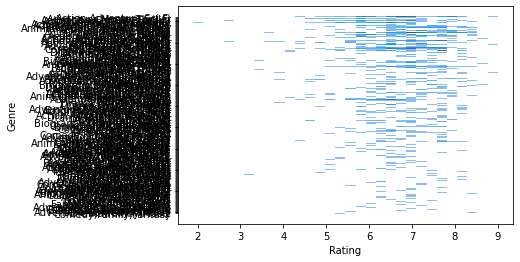

In [78]:
# Plot the rating data against genres
sns.histplot(data= df, x= "Rating", y= "Genre")
# First, lets mirror what our reference article plots



That graph isn't very helpful! 
Create a new code cell below this and create the same plot, but this time for data used,
use only the first 20 entries.
Do you find that any easier to read and interpret?
Next, create one more cell. Use the same axes and the top 20 items in the data, but plot using ``sns.scatterplot()``. Do you learn anything different between the boxplot and the scatterplot?

<AxesSubplot:xlabel='Rating', ylabel='Genre'>

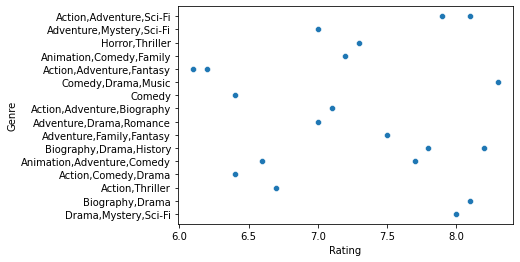

In [77]:
sns.scatterplot(data= df.head(20), x= "Rating", y= "Genre")

### 6. Make a chart to show the number of films in each rating group each year

In [114]:
# Create a new column called rating_group
rating_group = df['Rating']
# Use to pd.cut() to bin(group) the rating_group column values by integer intervals 1-10
#ating_group['bins'] = pd.cut(x=df[rating_group],bins=[1,2,3,4,5,6,7,8,9,10])
# rating_group = pd.Series(df['Rating']([1,2,3,4,5,6,7,8,9,10,11]))

In [113]:
# Make a chart to show the number of films in each rating group per year
# num_of_films = df["Rating"].value_counts
# sns.histplot(data= df, x= "Rating", y = "num_of_films")
# rating_chart=df.groupby('Rating')['Rating'].count()


Each year, which rating range(s) is the most concentrated? Does this match your results from the box and scatter plots above?